In [1]:
import IPython 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This notebook presents an estimate of the number of positioner collisions per pointing.

The positioner's geometry is defined from the DESIDoc 8999 v2. Images are taken from the same doc.

There are three types of collisions.

1. Type I: No collision.
2. Type II: The two upper arms (fiber holders) collide
3. Type III: The upper arm of A collides with the body of B.


Example of Type 2 collision

Type II collisions requires resetting the target one of the two positioners in order to avoid the overlap.
This collision is equivalent to say that if one the positioners (A) is placed outsed the inner clear rotational envelope, the fiber cannot be closer than $2$ mm to other fiber.


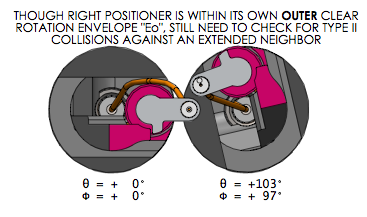

In [2]:
IPython.display.Image("../img/type2_collision.png")

Example of Type 2 collision

It seems to me that Type III collisions can be solved by changing the way positioner B reaches its target. It does not have to be solved in fiber assignment.

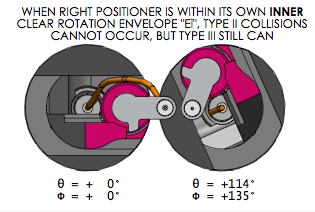

In [3]:
IPython.display.Image("../img/type3_collision.png")

# Test on poissonian targets

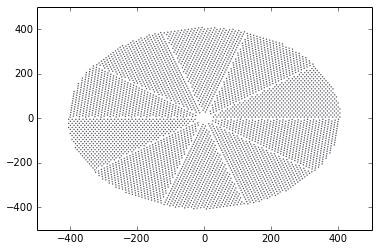

In [4]:
positioner_file = "../../surveyplan/data/pos_on_z1.txt"
positioner_data = loadtxt(positioner_file)
x_pos = positioner_data[:,1]
y_pos = positioner_data[:,2]
z_pos = positioner_data[:,3]
scatter(x_pos, y_pos, s=0.1)
n_pos = size(x_pos)

patrol_radius = 6.0
inner_radius = 5.0 
fiber_radius = 1.0


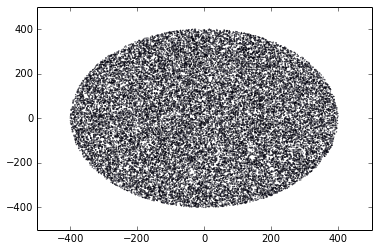

In [14]:
n_targets = n_pos * 5
theta_rand = 2.0*pi*random.random(n_targets)
r_rand = 160000.0*random.random(n_targets)
x_target = sqrt(r_rand) * sin(theta_rand)
y_target = sqrt(r_rand) * cos(theta_rand)
scatter(x_target, y_target, s=0.1)

In [15]:
x_on_target = zeros(n_pos)
y_on_target = zeros(n_pos)
target_available = zeros(n_targets)
for i in range(n_pos):
    x_pos_i = x_pos[i]
    y_pos_i = y_pos[i]
    
    distance = sqrt((x_target-x_pos_i)**2 + (y_target - y_pos_i)**2)
    reachable = where((distance<patrol_radius)&(target_available==0))
    reachable = reachable[0]
    n_reachable = size(reachable)
    
    if (n_reachable):
        x_on_target[i] = x_target[reachable[0]]
        y_on_target[i] = y_target[reachable[0]]
        target_available[reachable[0]] = -1
    else:
        x_on_target[i] = x_pos_i
        y_on_target[i] = y_pos_i

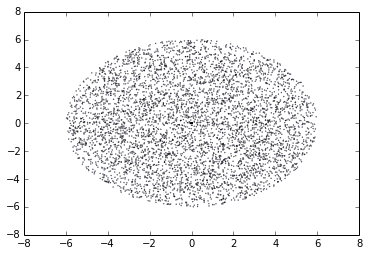

In [16]:
scatter(x_on_target-x_pos, y_on_target-y_pos, s=0.1)

In [17]:
#count how many Type II collisions are happening
possible = 0
collision_id = empty((0), dtype='int')
for i in range(n_pos):
    x_on_t = x_on_target[i]
    y_on_t = y_on_target[i]
    x_pos_i = x_pos[i]
    y_pos_i = y_pos[i]
    
   
    distance = sqrt((x_on_target-x_on_t)**2 + (y_on_target - y_on_t)**2)
    close = where(distance<(2.0*fiber_radius))
    if(size(close)==2):#this indicates that a Type II collision is possible
        collision_id=append(collision_id, close)
list_fiber_collide = sorted(set(collision_id))
print "number of colliding fibers:", size(list_fiber_collide)
print "about %d percent of positioners collide"%(100*size(list_fiber_collide)/n_pos)

number of colliding fibers: 173
about 3 percent of positioners collide


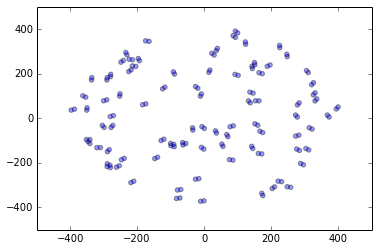

In [18]:
scatter(x_pos[list_fiber_collide], y_pos[list_fiber_collide], alpha=0.4)